In [7]:


# -*- coding: utf-8 -*-
"""
Lat updated on  May 26 2021

@author: Ioannis Pastellas
"""


from qiskit import Aer, execute
from qiskit.aqua.components.initial_states import Custom


A = 500 #penalty
# Compute the value of the cost function MaxCut
def cost_function_C(x):
    C = 0
    for i in range(n):
        for j in range(n):
            for t in range(n-1):
              C = C+ adj[i][j] * x[t*n +i]*x[(t+1)*n + j]
          
    #penalties
    for t in range(0,n):
        s = 0
        for i in range(0,n):
            s = s + x[t*n+i]
        C = C + A*((1-s) **2)
        
     #penalties
    for i in range(0,n):
        s = 0
        for t in range(0,n):
            s = s + x[t*n+i]
        C = C + A*((1-s) **2)
          
    return C;



In [8]:

def objective(params):
    
    
    initial = Custom(n**2,circuit= circ)
    aqua_globals.random_seed = 10598
    quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'),
                                   seed_simulator=aqua_globals.random_seed,
                                   seed_transpiler=aqua_globals.random_seed)
    qaoa_mes = QAOA(quantum_instance=quantum_instance,operator = qubitOp,p=n_layers,initial_point= params)   
    circuit2 = QuantumCircuit(n**2)
    circuit = qaoa_mes.construct_circuit(params)
    
    
    #create measurements on classical register
    reg = ClassicalRegister(n**2)
    circuit[0].add_register(reg)
    circuit[0].measure(range(n**2),range(n**2))
    
    
    # Execution of circuit(either simulation or on real quantum machines)
    backend      = Aer.get_backend("qasm_simulator")
    shots        = 1024

    simulate     = execute(circuit[0], backend=backend, shots=shots)
    QAOA_results = simulate.result()

    #plot_histogram(QAOA_results.get_counts(),figsize = (8,6),bar_labels = False)
  
    val = 0
    # Evaluate the data from the simulator
    counts = QAOA_results.get_counts()

    expectedCost       = 0
    maxCost       = [0,0]
    hist        = {}
    
    
    for sample in list(counts.keys()):
     
     # use sampled bit string x to compute C(x)
     x2  = [int(num) for num in list(sample)]
     tmp_eng   = cost_function_C(x2)
    
     # compute the expectation value and energy distribution
     expectedCost      = expectedCost     + counts[sample]*tmp_eng

    

    return expectedCost/shots; #/(shots);        
    #M1_sampled   = avr_C/shots

In [ ]:
# read the graph example from text file
def read_graph(n):
    f = open("graph.txt", "r")
    lines = f.readlines()
    adje = [[0 for i in range(n)] for j in range(n)]
    for line in lines:
        a = [float(x) for x in line.split()]
        if a[0] > a[1]:
            temp = a[0]
            a[0] = a[1]
            a[1] = temp
        adje[int(a[0])][int(a[1])] = a[2]
        adje[int(a[1])][int(a[0])] = a[2]
    
    for i in range(n):
      for j in range(n):
         if (adje[i][j] == 0  ):
             adje[i][j] = 0 #attention
    #sorted(E,key=lambda tup: tup[0])
    return adje

In [9]:
#import all necessary libraries
import qiskit
qiskit.__qiskit_version__


# useful additional packages 

#import math tools
import numpy as np

# We import the tools to handle general Graphs
import networkx as nx

# We import plotting tools 
import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter


# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit.aqua.components.optimizers import COBYLA, SPSA, SLSQP,ADAM,P_BFGS
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from numpy import float64
from qiskit.providers.ibmq      import least_busy
from qiskit.tools.monitor       import job_monitor
from qiskit.visualization import plot_histogram
#from qiskit.optimization.algorithms import CobylaOptimizer

from qiskit.aqua.operators.evolutions import Trotter,Suzuki, EvolvedOp,MatrixEvolution, PauliTrotterEvolution
from qiskit.quantum_info.operators import Operator
from qiskit.aqua.operators import OperatorBase,PrimitiveOp
from qiskit.aqua.operators.list_ops import SummedOp
from qiskit.aqua.algorithms import QAOA
from qiskit.aqua import aqua_globals
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising import max_cut, tsp
from qiskit.optimization import QuadraticProgram
from qiskit.aqua.algorithms import NumPyMinimumEigensolver
from qiskit.optimization.algorithms import MinimumEigenOptimizer, RecursiveMinimumEigenOptimizer
#IBMQ.save_account(token ='e6c04b18b629e7445a2e6c171cdc4dccfeb71d7d091ead04b6bd1908eb24fc3280ce1a9420e7f92a4968a4dcc90fe922e18fcf30cdba147540ec85aab535f365')
#IBMQ.load_account() # Load account from disk
#IBMQ.providers()    # List all available providers
from qiskit.optimization.applications.ising.docplex import *
from qiskit.aqua.components.initial_states import Custom
from grid_search import *

[[1, 0], [0, -1]]

p=1
[[0.0, 48.0, 91.0], [48.0, 0.0, 63.0], [91.0, 63.0, 0.0]]


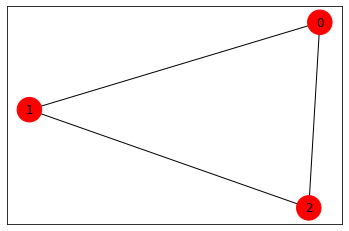

In [10]:

global n

# Another way to include
n     = 3
V     = np.arange(0,n,1)
E     =[(0,1,1.0),(0,2,1.0),(1,2,1.0)]

global G 
G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

E = G.edges()


# Generate plot of the Graph
colors       = ['r' for node in G.nodes()]
default_axes = plt.axes(frameon=True)
pos          = nx.spring_layout(G)

nx.draw_networkx(G, node_color=colors, node_size=600, alpha=1, ax=default_axes, pos=pos)

global n_layers, length
n_layers = 1
print("\np={:d}".format(n_layers))

global adj
adj = read_graph(n)


global ins
ins = tsp.random_tsp(n, seed=123)


for i in range(0, ins.dim):
    for j in range(0, ins.dim):
        adj[i][j] = ins.w[i,j]
print(adj)

The below cell is where you model the cost function of a problem you want to perform the QAOA. Qiskit has a way to convert the cost function into a qubitop circuit.

In [11]:
global qubitOp

mdl = Model(name='tsp-1')
x2 = {i: mdl.binary_var() for i in range(n**2) } #the possible bitstrings

# Object function
tsp_func = mdl.sum(adj[i][j] * x2[t*n +i]*x2[(t+1)*n + j]  for i in range(n) for j in range(n) for t in range(n-1))
mdl.minimize(tsp_func)
        
# Constraints

for t in range(n):
    mdl.add_constraint(mdl.sum(x2[t*n+i] for i in range(n)) == 1)
for i in range(n):
    mdl.add_constraint(mdl.sum(x2[t*n+i] for t in range(n)) == 1)

In [12]:
 
qubitOp, offset = get_operator(mdl)     
print('Offset:', offset)
print('Ising Hamiltonian:')
print(qubitOp.print_details())

0.0008093883180924988
Offset: 5056.0
Ising Hamiltonian:
IIIIZIIIZ	(12+0j)
IIIIIIIIZ	(-843.75+0j)
IIIIZIIII	(-864.5+0j)
IZIIIZIII	(12+0j)
IIIIIZIII	(-878.5+0j)
IZIIIIIII	(-836.75+0j)
IIIZIIIIZ	(22.75+0j)
IIIZIIIII	(-886+0j)
ZIIIIZIII	(22.75+0j)
ZIIIIIIII	(-847.5+0j)
IIIIIZIZI	(12+0j)
IIIIIIIZI	(-836.75+0j)
IIZIZIIII	(12+0j)
IIZIIIIII	(-843.75+0j)
IIIZIIIZI	(15.75+0j)
ZIIIZIIII	(15.75+0j)
IIIIIZZII	(22.75+0j)
IIIIIIZII	(-847.5+0j)
IIZZIIIII	(22.75+0j)
IIIIZIZII	(15.75+0j)
IZIZIIIII	(15.75+0j)
IIIIIIIZZ	(404.5+0j)
IIIIIIZIZ	(404.5+0j)
IIIIIIZZI	(404.5+0j)
IIIIZZIII	(404.5+0j)
IIIZIZIII	(404.5+0j)
IIIZZIIII	(404.5+0j)
IZZIIIIII	(404.5+0j)
ZIZIIIIII	(404.5+0j)
ZZIIIIIII	(404.5+0j)
IIIIIZIIZ	(404.5+0j)
IIZIIIIIZ	(404.5+0j)
IIZIIZIII	(404.5+0j)
IIIIZIIZI	(404.5+0j)
IZIIIIIZI	(404.5+0j)
IZIIZIIII	(404.5+0j)
IIIZIIZII	(404.5+0j)
ZIIIIIZII	(404.5+0j)
ZIIZIIIII	(404.5+0j)



In [13]:
import time
sample = generate_grid_2(1,0.1)    # generate grid for layer p=1 and step-size = 0,05

time1 =(time.time())
f = [objective(par) for par in sample] # creates a list for function evaluations over the grid
time2 =(time.time())

best_index = 0

for i in range(len(sample)):
    if f[i] < f[best_index]:
        best_index = i
        


[[0.0, 0.0], [0.0, 0.05], [0.0, 0.1], [0.0, 0.15000000000000002], [0.0, 0.2], [0.0, 0.25], [0.0, 0.30000000000000004], [0.0, 0.35000000000000003], [0.0, 0.4], [0.0, 0.45], [0.0, 0.5], [0.0, 0.55], [0.0, 0.6000000000000001], [0.0, 0.65], [0.0, 0.7000000000000001], [0.0, 0.75], [0.0, 0.8], [0.0, 0.8500000000000001], [0.0, 0.9], [0.0, 0.9500000000000001], [0.0, 1.0], [0.0, 1.05], [0.0, 1.1], [0.0, 1.1500000000000001], [0.0, 1.2000000000000002], [0.0, 1.25], [0.0, 1.3], [0.0, 1.35], [0.0, 1.4000000000000001], [0.0, 1.4500000000000002], [0.0, 1.5], [0.0, 1.55], [0.0, 1.6], [0.0, 1.6500000000000001], [0.0, 1.7000000000000002], [0.0, 1.75], [0.0, 1.8], [0.0, 1.85], [0.0, 1.9000000000000001], [0.0, 1.9500000000000002], [0.0, 2.0], [0.0, 2.0500000000000003], [0.0, 2.1], [0.0, 2.15], [0.0, 2.2], [0.0, 2.25], [0.0, 2.3000000000000003], [0.0, 2.35], [0.0, 2.4000000000000004], [0.0, 2.45], [0.0, 2.5], [0.0, 2.5500000000000003], [0.0, 2.6], [0.0, 2.6500000000000004], [0.0, 2.7], [0.0, 2.75], [0.0, 2

[0.0, 0.05]
[0.0, 0.1]
[0.0, 0.15000000000000002]
[0.0, 0.2]
[0.0, 0.25]
[0.0, 0.30000000000000004]
[0.0, 0.35000000000000003]
[0.0, 0.4]
[0.0, 0.45]
[0.0, 0.5]
[0.0, 0.55]
[0.0, 0.6000000000000001]
[0.0, 0.65]
[0.0, 0.7000000000000001]
[0.0, 0.75]
[0.0, 0.8]
[0.0, 0.8500000000000001]
[0.0, 0.9]
[0.0, 0.9500000000000001]
[0.0, 1.0]
[0.0, 1.05]
[0.0, 1.1]
[0.0, 1.1500000000000001]
[0.0, 1.2000000000000002]
[0.0, 1.25]
[0.0, 1.3]
[0.0, 1.35]
[0.0, 1.4000000000000001]
[0.0, 1.4500000000000002]
[0.0, 1.5]
[0.0, 1.55]
[0.0, 1.6]
[0.0, 1.6500000000000001]
[0.0, 1.7000000000000002]
[0.0, 1.75]
[0.0, 1.8]
[0.0, 1.85]
[0.0, 1.9000000000000001]
[0.0, 1.9500000000000002]
[0.0, 2.0]
[0.0, 2.0500000000000003]
[0.0, 2.1]
[0.0, 2.15]
[0.0, 2.2]
[0.0, 2.25]
[0.0, 2.3000000000000003]
[0.0, 2.35]
[0.0, 2.4000000000000004]
[0.0, 2.45]
[0.0, 2.5]
[0.0, 2.5500000000000003]
[0.0, 2.6]
[0.0, 2.6500000000000004]
[0.0, 2.7]
[0.0, 2.75]
[0.0, 2.8000000000000003]
[0.0, 2.85]
[0.0, 2.9000000000000004]
[0.0, 2.95]

[0.30000000000000004, 1.1500000000000001]
[0.30000000000000004, 1.2000000000000002]
[0.30000000000000004, 1.25]
[0.30000000000000004, 1.3]
[0.30000000000000004, 1.35]
[0.30000000000000004, 1.4000000000000001]
[0.30000000000000004, 1.4500000000000002]
[0.30000000000000004, 1.5]
[0.30000000000000004, 1.55]
[0.30000000000000004, 1.6]
[0.30000000000000004, 1.6500000000000001]
[0.30000000000000004, 1.7000000000000002]
[0.30000000000000004, 1.75]
[0.30000000000000004, 1.8]
[0.30000000000000004, 1.85]
[0.30000000000000004, 1.9000000000000001]
[0.30000000000000004, 1.9500000000000002]
[0.30000000000000004, 2.0]
[0.30000000000000004, 2.0500000000000003]
[0.30000000000000004, 2.1]
[0.30000000000000004, 2.15]
[0.30000000000000004, 2.2]
[0.30000000000000004, 2.25]
[0.30000000000000004, 2.3000000000000003]
[0.30000000000000004, 2.35]
[0.30000000000000004, 2.4000000000000004]
[0.30000000000000004, 2.45]
[0.30000000000000004, 2.5]
[0.30000000000000004, 2.5500000000000003]
[0.30000000000000004, 2.6]
[

[0.6000000000000001, 0.7000000000000001]
[0.6000000000000001, 0.75]
[0.6000000000000001, 0.8]
[0.6000000000000001, 0.8500000000000001]
[0.6000000000000001, 0.9]
[0.6000000000000001, 0.9500000000000001]
[0.6000000000000001, 1.0]
[0.6000000000000001, 1.05]
[0.6000000000000001, 1.1]
[0.6000000000000001, 1.1500000000000001]
[0.6000000000000001, 1.2000000000000002]
[0.6000000000000001, 1.25]
[0.6000000000000001, 1.3]
[0.6000000000000001, 1.35]
[0.6000000000000001, 1.4000000000000001]
[0.6000000000000001, 1.4500000000000002]
[0.6000000000000001, 1.5]
[0.6000000000000001, 1.55]
[0.6000000000000001, 1.6]
[0.6000000000000001, 1.6500000000000001]
[0.6000000000000001, 1.7000000000000002]
[0.6000000000000001, 1.75]
[0.6000000000000001, 1.8]
[0.6000000000000001, 1.85]
[0.6000000000000001, 1.9000000000000001]
[0.6000000000000001, 1.9500000000000002]
[0.6000000000000001, 2.0]
[0.6000000000000001, 2.0500000000000003]
[0.6000000000000001, 2.1]
[0.6000000000000001, 2.15]
[0.6000000000000001, 2.2]
[0.600

[0.8500000000000001, 2.1]
[0.8500000000000001, 2.15]
[0.8500000000000001, 2.2]
[0.8500000000000001, 2.25]
[0.8500000000000001, 2.3000000000000003]
[0.8500000000000001, 2.35]
[0.8500000000000001, 2.4000000000000004]
[0.8500000000000001, 2.45]
[0.8500000000000001, 2.5]
[0.8500000000000001, 2.5500000000000003]
[0.8500000000000001, 2.6]
[0.8500000000000001, 2.6500000000000004]
[0.8500000000000001, 2.7]
[0.8500000000000001, 2.75]
[0.8500000000000001, 2.8000000000000003]
[0.8500000000000001, 2.85]
[0.8500000000000001, 2.9000000000000004]
[0.8500000000000001, 2.95]
[0.8500000000000001, 3.0]
[0.8500000000000001, 3.0500000000000003]
[0.8500000000000001, 3.1]
[0.9, 0.0]
[0.9, 0.05]
[0.9, 0.1]
[0.9, 0.15000000000000002]
[0.9, 0.2]
[0.9, 0.25]
[0.9, 0.30000000000000004]
[0.9, 0.35000000000000003]
[0.9, 0.4]
[0.9, 0.45]
[0.9, 0.5]
[0.9, 0.55]
[0.9, 0.6000000000000001]
[0.9, 0.65]
[0.9, 0.7000000000000001]
[0.9, 0.75]
[0.9, 0.8]
[0.9, 0.8500000000000001]
[0.9, 0.9]
[0.9, 0.9500000000000001]
[0.9, 1.

[1.1500000000000001, 1.9500000000000002]
[1.1500000000000001, 2.0]
[1.1500000000000001, 2.0500000000000003]
[1.1500000000000001, 2.1]
[1.1500000000000001, 2.15]
[1.1500000000000001, 2.2]
[1.1500000000000001, 2.25]
[1.1500000000000001, 2.3000000000000003]
[1.1500000000000001, 2.35]
[1.1500000000000001, 2.4000000000000004]
[1.1500000000000001, 2.45]
[1.1500000000000001, 2.5]
[1.1500000000000001, 2.5500000000000003]
[1.1500000000000001, 2.6]
[1.1500000000000001, 2.6500000000000004]
[1.1500000000000001, 2.7]
[1.1500000000000001, 2.75]
[1.1500000000000001, 2.8000000000000003]
[1.1500000000000001, 2.85]
[1.1500000000000001, 2.9000000000000004]
[1.1500000000000001, 2.95]
[1.1500000000000001, 3.0]
[1.1500000000000001, 3.0500000000000003]
[1.1500000000000001, 3.1]
[1.2000000000000002, 0.0]
[1.2000000000000002, 0.05]
[1.2000000000000002, 0.1]
[1.2000000000000002, 0.15000000000000002]
[1.2000000000000002, 0.2]
[1.2000000000000002, 0.25]
[1.2000000000000002, 0.30000000000000004]
[1.200000000000000

[1.4500000000000002, 0.2]
[1.4500000000000002, 0.25]
[1.4500000000000002, 0.30000000000000004]
[1.4500000000000002, 0.35000000000000003]
[1.4500000000000002, 0.4]
[1.4500000000000002, 0.45]
[1.4500000000000002, 0.5]
[1.4500000000000002, 0.55]
[1.4500000000000002, 0.6000000000000001]
[1.4500000000000002, 0.65]
[1.4500000000000002, 0.7000000000000001]
[1.4500000000000002, 0.75]
[1.4500000000000002, 0.8]
[1.4500000000000002, 0.8500000000000001]
[1.4500000000000002, 0.9]
[1.4500000000000002, 0.9500000000000001]
[1.4500000000000002, 1.0]
[1.4500000000000002, 1.05]
[1.4500000000000002, 1.1]
[1.4500000000000002, 1.1500000000000001]
[1.4500000000000002, 1.2000000000000002]
[1.4500000000000002, 1.25]
[1.4500000000000002, 1.3]
[1.4500000000000002, 1.35]
[1.4500000000000002, 1.4000000000000001]
[1.4500000000000002, 1.4500000000000002]
[1.4500000000000002, 1.5]
[1.4500000000000002, 1.55]
[1.4500000000000002, 1.6]
[1.4500000000000002, 1.6500000000000001]
[1.4500000000000002, 1.7000000000000002]
[1.

[1.7000000000000002, 1.7000000000000002]
[1.7000000000000002, 1.75]
[1.7000000000000002, 1.8]
[1.7000000000000002, 1.85]
[1.7000000000000002, 1.9000000000000001]
[1.7000000000000002, 1.9500000000000002]
[1.7000000000000002, 2.0]
[1.7000000000000002, 2.0500000000000003]
[1.7000000000000002, 2.1]
[1.7000000000000002, 2.15]
[1.7000000000000002, 2.2]
[1.7000000000000002, 2.25]
[1.7000000000000002, 2.3000000000000003]
[1.7000000000000002, 2.35]
[1.7000000000000002, 2.4000000000000004]
[1.7000000000000002, 2.45]
[1.7000000000000002, 2.5]
[1.7000000000000002, 2.5500000000000003]
[1.7000000000000002, 2.6]
[1.7000000000000002, 2.6500000000000004]
[1.7000000000000002, 2.7]
[1.7000000000000002, 2.75]
[1.7000000000000002, 2.8000000000000003]
[1.7000000000000002, 2.85]
[1.7000000000000002, 2.9000000000000004]
[1.7000000000000002, 2.95]
[1.7000000000000002, 3.0]
[1.7000000000000002, 3.0500000000000003]
[1.7000000000000002, 3.1]
[1.75, 0.0]
[1.75, 0.05]
[1.75, 0.1]
[1.75, 0.15000000000000002]
[1.75, 

[1.9500000000000002, 3.1]
[2.0, 0.0]
[2.0, 0.05]
[2.0, 0.1]
[2.0, 0.15000000000000002]
[2.0, 0.2]
[2.0, 0.25]
[2.0, 0.30000000000000004]
[2.0, 0.35000000000000003]
[2.0, 0.4]
[2.0, 0.45]
[2.0, 0.5]
[2.0, 0.55]
[2.0, 0.6000000000000001]
[2.0, 0.65]
[2.0, 0.7000000000000001]
[2.0, 0.75]
[2.0, 0.8]
[2.0, 0.8500000000000001]
[2.0, 0.9]
[2.0, 0.9500000000000001]
[2.0, 1.0]
[2.0, 1.05]
[2.0, 1.1]
[2.0, 1.1500000000000001]
[2.0, 1.2000000000000002]
[2.0, 1.25]
[2.0, 1.3]
[2.0, 1.35]
[2.0, 1.4000000000000001]
[2.0, 1.4500000000000002]
[2.0, 1.5]
[2.0, 1.55]
[2.0, 1.6]
[2.0, 1.6500000000000001]
[2.0, 1.7000000000000002]
[2.0, 1.75]
[2.0, 1.8]
[2.0, 1.85]
[2.0, 1.9000000000000001]
[2.0, 1.9500000000000002]
[2.0, 2.0]
[2.0, 2.0500000000000003]
[2.0, 2.1]
[2.0, 2.15]
[2.0, 2.2]
[2.0, 2.25]
[2.0, 2.3000000000000003]
[2.0, 2.35]
[2.0, 2.4000000000000004]
[2.0, 2.45]
[2.0, 2.5]
[2.0, 2.5500000000000003]
[2.0, 2.6]
[2.0, 2.6500000000000004]
[2.0, 2.7]
[2.0, 2.75]
[2.0, 2.8000000000000003]
[2.0, 2.85]


[2.3000000000000003, 1.2000000000000002]
[2.3000000000000003, 1.25]
[2.3000000000000003, 1.3]
[2.3000000000000003, 1.35]
[2.3000000000000003, 1.4000000000000001]
[2.3000000000000003, 1.4500000000000002]
[2.3000000000000003, 1.5]
[2.3000000000000003, 1.55]
[2.3000000000000003, 1.6]
[2.3000000000000003, 1.6500000000000001]
[2.3000000000000003, 1.7000000000000002]
[2.3000000000000003, 1.75]
[2.3000000000000003, 1.8]
[2.3000000000000003, 1.85]
[2.3000000000000003, 1.9000000000000001]
[2.3000000000000003, 1.9500000000000002]
[2.3000000000000003, 2.0]
[2.3000000000000003, 2.0500000000000003]
[2.3000000000000003, 2.1]
[2.3000000000000003, 2.15]
[2.3000000000000003, 2.2]
[2.3000000000000003, 2.25]
[2.3000000000000003, 2.3000000000000003]
[2.3000000000000003, 2.35]
[2.3000000000000003, 2.4000000000000004]
[2.3000000000000003, 2.45]
[2.3000000000000003, 2.5]
[2.3000000000000003, 2.5500000000000003]
[2.3000000000000003, 2.6]
[2.3000000000000003, 2.6500000000000004]
[2.3000000000000003, 2.7]
[2.30

[2.5500000000000003, 2.6]
[2.5500000000000003, 2.6500000000000004]
[2.5500000000000003, 2.7]
[2.5500000000000003, 2.75]
[2.5500000000000003, 2.8000000000000003]
[2.5500000000000003, 2.85]
[2.5500000000000003, 2.9000000000000004]
[2.5500000000000003, 2.95]
[2.5500000000000003, 3.0]
[2.5500000000000003, 3.0500000000000003]
[2.5500000000000003, 3.1]
[2.6, 0.0]
[2.6, 0.05]
[2.6, 0.1]
[2.6, 0.15000000000000002]
[2.6, 0.2]
[2.6, 0.25]
[2.6, 0.30000000000000004]
[2.6, 0.35000000000000003]
[2.6, 0.4]
[2.6, 0.45]
[2.6, 0.5]
[2.6, 0.55]
[2.6, 0.6000000000000001]
[2.6, 0.65]
[2.6, 0.7000000000000001]
[2.6, 0.75]
[2.6, 0.8]
[2.6, 0.8500000000000001]
[2.6, 0.9]
[2.6, 0.9500000000000001]
[2.6, 1.0]
[2.6, 1.05]
[2.6, 1.1]
[2.6, 1.1500000000000001]
[2.6, 1.2000000000000002]
[2.6, 1.25]
[2.6, 1.3]
[2.6, 1.35]
[2.6, 1.4000000000000001]
[2.6, 1.4500000000000002]
[2.6, 1.5]
[2.6, 1.55]
[2.6, 1.6]
[2.6, 1.6500000000000001]
[2.6, 1.7000000000000002]
[2.6, 1.75]
[2.6, 1.8]
[2.6, 1.85]
[2.6, 1.900000000000000

[2.85, 1.7000000000000002]
[2.85, 1.75]
[2.85, 1.8]
[2.85, 1.85]
[2.85, 1.9000000000000001]
[2.85, 1.9500000000000002]
[2.85, 2.0]
[2.85, 2.0500000000000003]
[2.85, 2.1]
[2.85, 2.15]
[2.85, 2.2]
[2.85, 2.25]
[2.85, 2.3000000000000003]
[2.85, 2.35]
[2.85, 2.4000000000000004]
[2.85, 2.45]
[2.85, 2.5]
[2.85, 2.5500000000000003]
[2.85, 2.6]
[2.85, 2.6500000000000004]
[2.85, 2.7]
[2.85, 2.75]
[2.85, 2.8000000000000003]
[2.85, 2.85]
[2.85, 2.9000000000000004]
[2.85, 2.95]
[2.85, 3.0]
[2.85, 3.0500000000000003]
[2.85, 3.1]
[2.9000000000000004, 0.0]
[2.9000000000000004, 0.05]
[2.9000000000000004, 0.1]
[2.9000000000000004, 0.15000000000000002]
[2.9000000000000004, 0.2]
[2.9000000000000004, 0.25]
[2.9000000000000004, 0.30000000000000004]
[2.9000000000000004, 0.35000000000000003]
[2.9000000000000004, 0.4]
[2.9000000000000004, 0.45]
[2.9000000000000004, 0.5]
[2.9000000000000004, 0.55]
[2.9000000000000004, 0.6000000000000001]
[2.9000000000000004, 0.65]
[2.9000000000000004, 0.7000000000000001]
[2.90

[3.1500000000000004, 0.7000000000000001]
[3.1500000000000004, 0.75]
[3.1500000000000004, 0.8]
[3.1500000000000004, 0.8500000000000001]
[3.1500000000000004, 0.9]
[3.1500000000000004, 0.9500000000000001]
[3.1500000000000004, 1.0]
[3.1500000000000004, 1.05]
[3.1500000000000004, 1.1]
[3.1500000000000004, 1.1500000000000001]
[3.1500000000000004, 1.2000000000000002]
[3.1500000000000004, 1.25]
[3.1500000000000004, 1.3]
[3.1500000000000004, 1.35]
[3.1500000000000004, 1.4000000000000001]
[3.1500000000000004, 1.4500000000000002]
[3.1500000000000004, 1.5]
[3.1500000000000004, 1.55]
[3.1500000000000004, 1.6]
[3.1500000000000004, 1.6500000000000001]
[3.1500000000000004, 1.7000000000000002]
[3.1500000000000004, 1.75]
[3.1500000000000004, 1.8]
[3.1500000000000004, 1.85]
[3.1500000000000004, 1.9000000000000001]
[3.1500000000000004, 1.9500000000000002]
[3.1500000000000004, 2.0]
[3.1500000000000004, 2.0500000000000003]
[3.1500000000000004, 2.1]
[3.1500000000000004, 2.15]
[3.1500000000000004, 2.2]
[3.150

[3.4000000000000004, 2.1]
[3.4000000000000004, 2.15]
[3.4000000000000004, 2.2]
[3.4000000000000004, 2.25]
[3.4000000000000004, 2.3000000000000003]
[3.4000000000000004, 2.35]
[3.4000000000000004, 2.4000000000000004]
[3.4000000000000004, 2.45]
[3.4000000000000004, 2.5]
[3.4000000000000004, 2.5500000000000003]
[3.4000000000000004, 2.6]
[3.4000000000000004, 2.6500000000000004]
[3.4000000000000004, 2.7]
[3.4000000000000004, 2.75]
[3.4000000000000004, 2.8000000000000003]
[3.4000000000000004, 2.85]
[3.4000000000000004, 2.9000000000000004]
[3.4000000000000004, 2.95]
[3.4000000000000004, 3.0]
[3.4000000000000004, 3.0500000000000003]
[3.4000000000000004, 3.1]
[3.45, 0.0]
[3.45, 0.05]
[3.45, 0.1]
[3.45, 0.15000000000000002]
[3.45, 0.2]
[3.45, 0.25]
[3.45, 0.30000000000000004]
[3.45, 0.35000000000000003]
[3.45, 0.4]
[3.45, 0.45]
[3.45, 0.5]
[3.45, 0.55]
[3.45, 0.6000000000000001]
[3.45, 0.65]
[3.45, 0.7000000000000001]
[3.45, 0.75]
[3.45, 0.8]
[3.45, 0.8500000000000001]
[3.45, 0.9]
[3.45, 0.950000

[3.7, 0.9]
[3.7, 0.9500000000000001]
[3.7, 1.0]
[3.7, 1.05]
[3.7, 1.1]
[3.7, 1.1500000000000001]
[3.7, 1.2000000000000002]
[3.7, 1.25]
[3.7, 1.3]
[3.7, 1.35]
[3.7, 1.4000000000000001]
[3.7, 1.4500000000000002]
[3.7, 1.5]
[3.7, 1.55]
[3.7, 1.6]
[3.7, 1.6500000000000001]
[3.7, 1.7000000000000002]
[3.7, 1.75]
[3.7, 1.8]
[3.7, 1.85]
[3.7, 1.9000000000000001]
[3.7, 1.9500000000000002]
[3.7, 2.0]
[3.7, 2.0500000000000003]
[3.7, 2.1]
[3.7, 2.15]
[3.7, 2.2]
[3.7, 2.25]
[3.7, 2.3000000000000003]
[3.7, 2.35]
[3.7, 2.4000000000000004]
[3.7, 2.45]
[3.7, 2.5]
[3.7, 2.5500000000000003]
[3.7, 2.6]
[3.7, 2.6500000000000004]
[3.7, 2.7]
[3.7, 2.75]
[3.7, 2.8000000000000003]
[3.7, 2.85]
[3.7, 2.9000000000000004]
[3.7, 2.95]
[3.7, 3.0]
[3.7, 3.0500000000000003]
[3.7, 3.1]
[3.75, 0.0]
[3.75, 0.05]
[3.75, 0.1]
[3.75, 0.15000000000000002]
[3.75, 0.2]
[3.75, 0.25]
[3.75, 0.30000000000000004]
[3.75, 0.35000000000000003]
[3.75, 0.4]
[3.75, 0.45]
[3.75, 0.5]
[3.75, 0.55]
[3.75, 0.6000000000000001]
[3.75, 0.65]
[

[4.0, 0.2]
[4.0, 0.25]
[4.0, 0.30000000000000004]
[4.0, 0.35000000000000003]
[4.0, 0.4]
[4.0, 0.45]
[4.0, 0.5]
[4.0, 0.55]
[4.0, 0.6000000000000001]
[4.0, 0.65]
[4.0, 0.7000000000000001]
[4.0, 0.75]
[4.0, 0.8]
[4.0, 0.8500000000000001]
[4.0, 0.9]
[4.0, 0.9500000000000001]
[4.0, 1.0]
[4.0, 1.05]
[4.0, 1.1]
[4.0, 1.1500000000000001]
[4.0, 1.2000000000000002]
[4.0, 1.25]
[4.0, 1.3]
[4.0, 1.35]
[4.0, 1.4000000000000001]
[4.0, 1.4500000000000002]
[4.0, 1.5]
[4.0, 1.55]
[4.0, 1.6]
[4.0, 1.6500000000000001]
[4.0, 1.7000000000000002]
[4.0, 1.75]
[4.0, 1.8]
[4.0, 1.85]
[4.0, 1.9000000000000001]
[4.0, 1.9500000000000002]
[4.0, 2.0]
[4.0, 2.0500000000000003]
[4.0, 2.1]
[4.0, 2.15]
[4.0, 2.2]
[4.0, 2.25]
[4.0, 2.3000000000000003]
[4.0, 2.35]
[4.0, 2.4000000000000004]
[4.0, 2.45]
[4.0, 2.5]
[4.0, 2.5500000000000003]
[4.0, 2.6]
[4.0, 2.6500000000000004]
[4.0, 2.7]
[4.0, 2.75]
[4.0, 2.8000000000000003]
[4.0, 2.85]
[4.0, 2.9000000000000004]
[4.0, 2.95]
[4.0, 3.0]
[4.0, 3.0500000000000003]
[4.0, 3.1]
[

[4.3, 2.3000000000000003]
[4.3, 2.35]
[4.3, 2.4000000000000004]
[4.3, 2.45]
[4.3, 2.5]
[4.3, 2.5500000000000003]
[4.3, 2.6]
[4.3, 2.6500000000000004]
[4.3, 2.7]
[4.3, 2.75]
[4.3, 2.8000000000000003]
[4.3, 2.85]
[4.3, 2.9000000000000004]
[4.3, 2.95]
[4.3, 3.0]
[4.3, 3.0500000000000003]
[4.3, 3.1]
[4.3500000000000005, 0.0]
[4.3500000000000005, 0.05]
[4.3500000000000005, 0.1]
[4.3500000000000005, 0.15000000000000002]
[4.3500000000000005, 0.2]
[4.3500000000000005, 0.25]
[4.3500000000000005, 0.30000000000000004]
[4.3500000000000005, 0.35000000000000003]
[4.3500000000000005, 0.4]
[4.3500000000000005, 0.45]
[4.3500000000000005, 0.5]
[4.3500000000000005, 0.55]
[4.3500000000000005, 0.6000000000000001]
[4.3500000000000005, 0.65]
[4.3500000000000005, 0.7000000000000001]
[4.3500000000000005, 0.75]
[4.3500000000000005, 0.8]
[4.3500000000000005, 0.8500000000000001]
[4.3500000000000005, 0.9]
[4.3500000000000005, 0.9500000000000001]
[4.3500000000000005, 1.0]
[4.3500000000000005, 1.05]
[4.3500000000000

[4.6000000000000005, 2.45]
[4.6000000000000005, 2.5]
[4.6000000000000005, 2.5500000000000003]
[4.6000000000000005, 2.6]
[4.6000000000000005, 2.6500000000000004]
[4.6000000000000005, 2.7]
[4.6000000000000005, 2.75]
[4.6000000000000005, 2.8000000000000003]
[4.6000000000000005, 2.85]
[4.6000000000000005, 2.9000000000000004]
[4.6000000000000005, 2.95]
[4.6000000000000005, 3.0]
[4.6000000000000005, 3.0500000000000003]
[4.6000000000000005, 3.1]
[4.65, 0.0]
[4.65, 0.05]
[4.65, 0.1]
[4.65, 0.15000000000000002]
[4.65, 0.2]
[4.65, 0.25]
[4.65, 0.30000000000000004]
[4.65, 0.35000000000000003]
[4.65, 0.4]
[4.65, 0.45]
[4.65, 0.5]
[4.65, 0.55]
[4.65, 0.6000000000000001]
[4.65, 0.65]
[4.65, 0.7000000000000001]
[4.65, 0.75]
[4.65, 0.8]
[4.65, 0.8500000000000001]
[4.65, 0.9]
[4.65, 0.9500000000000001]
[4.65, 1.0]
[4.65, 1.05]
[4.65, 1.1]
[4.65, 1.1500000000000001]
[4.65, 1.2000000000000002]
[4.65, 1.25]
[4.65, 1.3]
[4.65, 1.35]
[4.65, 1.4000000000000001]
[4.65, 1.4500000000000002]
[4.65, 1.5]
[4.65, 1

[4.9, 1.5]
[4.9, 1.55]
[4.9, 1.6]
[4.9, 1.6500000000000001]
[4.9, 1.7000000000000002]
[4.9, 1.75]
[4.9, 1.8]
[4.9, 1.85]
[4.9, 1.9000000000000001]
[4.9, 1.9500000000000002]
[4.9, 2.0]
[4.9, 2.0500000000000003]
[4.9, 2.1]
[4.9, 2.15]
[4.9, 2.2]
[4.9, 2.25]
[4.9, 2.3000000000000003]
[4.9, 2.35]
[4.9, 2.4000000000000004]
[4.9, 2.45]
[4.9, 2.5]
[4.9, 2.5500000000000003]
[4.9, 2.6]
[4.9, 2.6500000000000004]
[4.9, 2.7]
[4.9, 2.75]
[4.9, 2.8000000000000003]
[4.9, 2.85]
[4.9, 2.9000000000000004]
[4.9, 2.95]
[4.9, 3.0]
[4.9, 3.0500000000000003]
[4.9, 3.1]
[4.95, 0.0]
[4.95, 0.05]
[4.95, 0.1]
[4.95, 0.15000000000000002]
[4.95, 0.2]
[4.95, 0.25]
[4.95, 0.30000000000000004]
[4.95, 0.35000000000000003]
[4.95, 0.4]
[4.95, 0.45]
[4.95, 0.5]
[4.95, 0.55]
[4.95, 0.6000000000000001]
[4.95, 0.65]
[4.95, 0.7000000000000001]
[4.95, 0.75]
[4.95, 0.8]
[4.95, 0.8500000000000001]
[4.95, 0.9]
[4.95, 0.9500000000000001]
[4.95, 1.0]
[4.95, 1.05]
[4.95, 1.1]
[4.95, 1.1500000000000001]
[4.95, 1.2000000000000002]
[4

[5.2, 1.2000000000000002]
[5.2, 1.25]
[5.2, 1.3]
[5.2, 1.35]
[5.2, 1.4000000000000001]
[5.2, 1.4500000000000002]
[5.2, 1.5]
[5.2, 1.55]
[5.2, 1.6]
[5.2, 1.6500000000000001]
[5.2, 1.7000000000000002]
[5.2, 1.75]
[5.2, 1.8]
[5.2, 1.85]
[5.2, 1.9000000000000001]
[5.2, 1.9500000000000002]
[5.2, 2.0]
[5.2, 2.0500000000000003]
[5.2, 2.1]
[5.2, 2.15]
[5.2, 2.2]
[5.2, 2.25]
[5.2, 2.3000000000000003]
[5.2, 2.35]
[5.2, 2.4000000000000004]
[5.2, 2.45]
[5.2, 2.5]
[5.2, 2.5500000000000003]
[5.2, 2.6]
[5.2, 2.6500000000000004]
[5.2, 2.7]
[5.2, 2.75]
[5.2, 2.8000000000000003]
[5.2, 2.85]
[5.2, 2.9000000000000004]
[5.2, 2.95]
[5.2, 3.0]
[5.2, 3.0500000000000003]
[5.2, 3.1]
[5.25, 0.0]
[5.25, 0.05]
[5.25, 0.1]
[5.25, 0.15000000000000002]
[5.25, 0.2]
[5.25, 0.25]
[5.25, 0.30000000000000004]
[5.25, 0.35000000000000003]
[5.25, 0.4]
[5.25, 0.45]
[5.25, 0.5]
[5.25, 0.55]
[5.25, 0.6000000000000001]
[5.25, 0.65]
[5.25, 0.7000000000000001]
[5.25, 0.75]
[5.25, 0.8]
[5.25, 0.8500000000000001]
[5.25, 0.9]
[5.25, 

[5.5, 0.9]
[5.5, 0.9500000000000001]
[5.5, 1.0]
[5.5, 1.05]
[5.5, 1.1]
[5.5, 1.1500000000000001]
[5.5, 1.2000000000000002]
[5.5, 1.25]
[5.5, 1.3]
[5.5, 1.35]
[5.5, 1.4000000000000001]
[5.5, 1.4500000000000002]
[5.5, 1.5]
[5.5, 1.55]
[5.5, 1.6]
[5.5, 1.6500000000000001]
[5.5, 1.7000000000000002]
[5.5, 1.75]
[5.5, 1.8]
[5.5, 1.85]
[5.5, 1.9000000000000001]
[5.5, 1.9500000000000002]
[5.5, 2.0]
[5.5, 2.0500000000000003]
[5.5, 2.1]
[5.5, 2.15]
[5.5, 2.2]
[5.5, 2.25]
[5.5, 2.3000000000000003]
[5.5, 2.35]
[5.5, 2.4000000000000004]
[5.5, 2.45]
[5.5, 2.5]
[5.5, 2.5500000000000003]
[5.5, 2.6]
[5.5, 2.6500000000000004]
[5.5, 2.7]
[5.5, 2.75]
[5.5, 2.8000000000000003]
[5.5, 2.85]
[5.5, 2.9000000000000004]
[5.5, 2.95]
[5.5, 3.0]
[5.5, 3.0500000000000003]
[5.5, 3.1]
[5.550000000000001, 0.0]
[5.550000000000001, 0.05]
[5.550000000000001, 0.1]
[5.550000000000001, 0.15000000000000002]
[5.550000000000001, 0.2]
[5.550000000000001, 0.25]
[5.550000000000001, 0.30000000000000004]
[5.550000000000001, 0.350000

[5.800000000000001, 0.35000000000000003]
[5.800000000000001, 0.4]
[5.800000000000001, 0.45]
[5.800000000000001, 0.5]
[5.800000000000001, 0.55]
[5.800000000000001, 0.6000000000000001]
[5.800000000000001, 0.65]
[5.800000000000001, 0.7000000000000001]
[5.800000000000001, 0.75]
[5.800000000000001, 0.8]
[5.800000000000001, 0.8500000000000001]
[5.800000000000001, 0.9]
[5.800000000000001, 0.9500000000000001]
[5.800000000000001, 1.0]
[5.800000000000001, 1.05]
[5.800000000000001, 1.1]
[5.800000000000001, 1.1500000000000001]
[5.800000000000001, 1.2000000000000002]
[5.800000000000001, 1.25]
[5.800000000000001, 1.3]
[5.800000000000001, 1.35]
[5.800000000000001, 1.4000000000000001]
[5.800000000000001, 1.4500000000000002]
[5.800000000000001, 1.5]
[5.800000000000001, 1.55]
[5.800000000000001, 1.6]
[5.800000000000001, 1.6500000000000001]
[5.800000000000001, 1.7000000000000002]
[5.800000000000001, 1.75]
[5.800000000000001, 1.8]
[5.800000000000001, 1.85]
[5.800000000000001, 1.9000000000000001]
[5.800000

[6.050000000000001, 2.0]
[6.050000000000001, 2.0500000000000003]
[6.050000000000001, 2.1]
[6.050000000000001, 2.15]
[6.050000000000001, 2.2]
[6.050000000000001, 2.25]
[6.050000000000001, 2.3000000000000003]
[6.050000000000001, 2.35]
[6.050000000000001, 2.4000000000000004]
[6.050000000000001, 2.45]
[6.050000000000001, 2.5]
[6.050000000000001, 2.5500000000000003]
[6.050000000000001, 2.6]
[6.050000000000001, 2.6500000000000004]
[6.050000000000001, 2.7]
[6.050000000000001, 2.75]
[6.050000000000001, 2.8000000000000003]
[6.050000000000001, 2.85]
[6.050000000000001, 2.9000000000000004]
[6.050000000000001, 2.95]
[6.050000000000001, 3.0]
[6.050000000000001, 3.0500000000000003]
[6.050000000000001, 3.1]
[6.1000000000000005, 0.0]
[6.1000000000000005, 0.05]
[6.1000000000000005, 0.1]
[6.1000000000000005, 0.15000000000000002]
[6.1000000000000005, 0.2]
[6.1000000000000005, 0.25]
[6.1000000000000005, 0.30000000000000004]
[6.1000000000000005, 0.35000000000000003]
[6.1000000000000005, 0.4]
[6.10000000000

In [14]:
print((time2-time1))  #optmizing step 

2612.257923603058


In [15]:
'''# Evaluate the function
step_size   = 0.1;

a_gamma         = np.arange(0, 2*np.pi, step_size)
a_beta          = np.arange(0, np.pi, step_size)

# Plot the expetation value F1
fig = plt.figure()
ax  = fig.gca(projection='3d')

surf = ax.plot_surface(a_gamma, a_beta, f, cmap=cm.coolwarm, linewidth=0, antialiased=True)

ax.set_zlim(1,4)
ax.zaxis.set_major_locator(LinearLocator(3))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show() '''

"# Evaluate the function\nstep_size   = 0.1;\n\na_gamma         = np.arange(0, 2*np.pi, step_size)\na_beta          = np.arange(0, np.pi, step_size)\n\n# Plot the expetation value F1\nfig = plt.figure()\nax  = fig.gca(projection='3d')\n\nsurf = ax.plot_surface(a_gamma, a_beta, f, cmap=cm.coolwarm, linewidth=0, antialiased=True)\n\nax.set_zlim(1,4)\nax.zaxis.set_major_locator(LinearLocator(3))\nax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))\n\nplt.show() "

In [16]:
# creates circuit using qaoa instance and optimal parameters
aqua_globals.random_seed = 10598
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'),
                                   seed_simulator=aqua_globals.random_seed,
                                   seed_transpiler=aqua_globals.random_seed)
qaoa_mes = QAOA(quantum_instance=quantum_instance,operator = qubitOp,p=n_layers,initial_point= params)  #initial_state = initial #initial_point=[0.,0.]
circuit2 = QuantumCircuit(n**2)
circuit = qaoa_mes.construct_circuit(sample[best_index])
    
reg = ClassicalRegister(n**2)
circuit[0].add_register(reg)
circuit[0].measure(range(n**2),range(n**2))

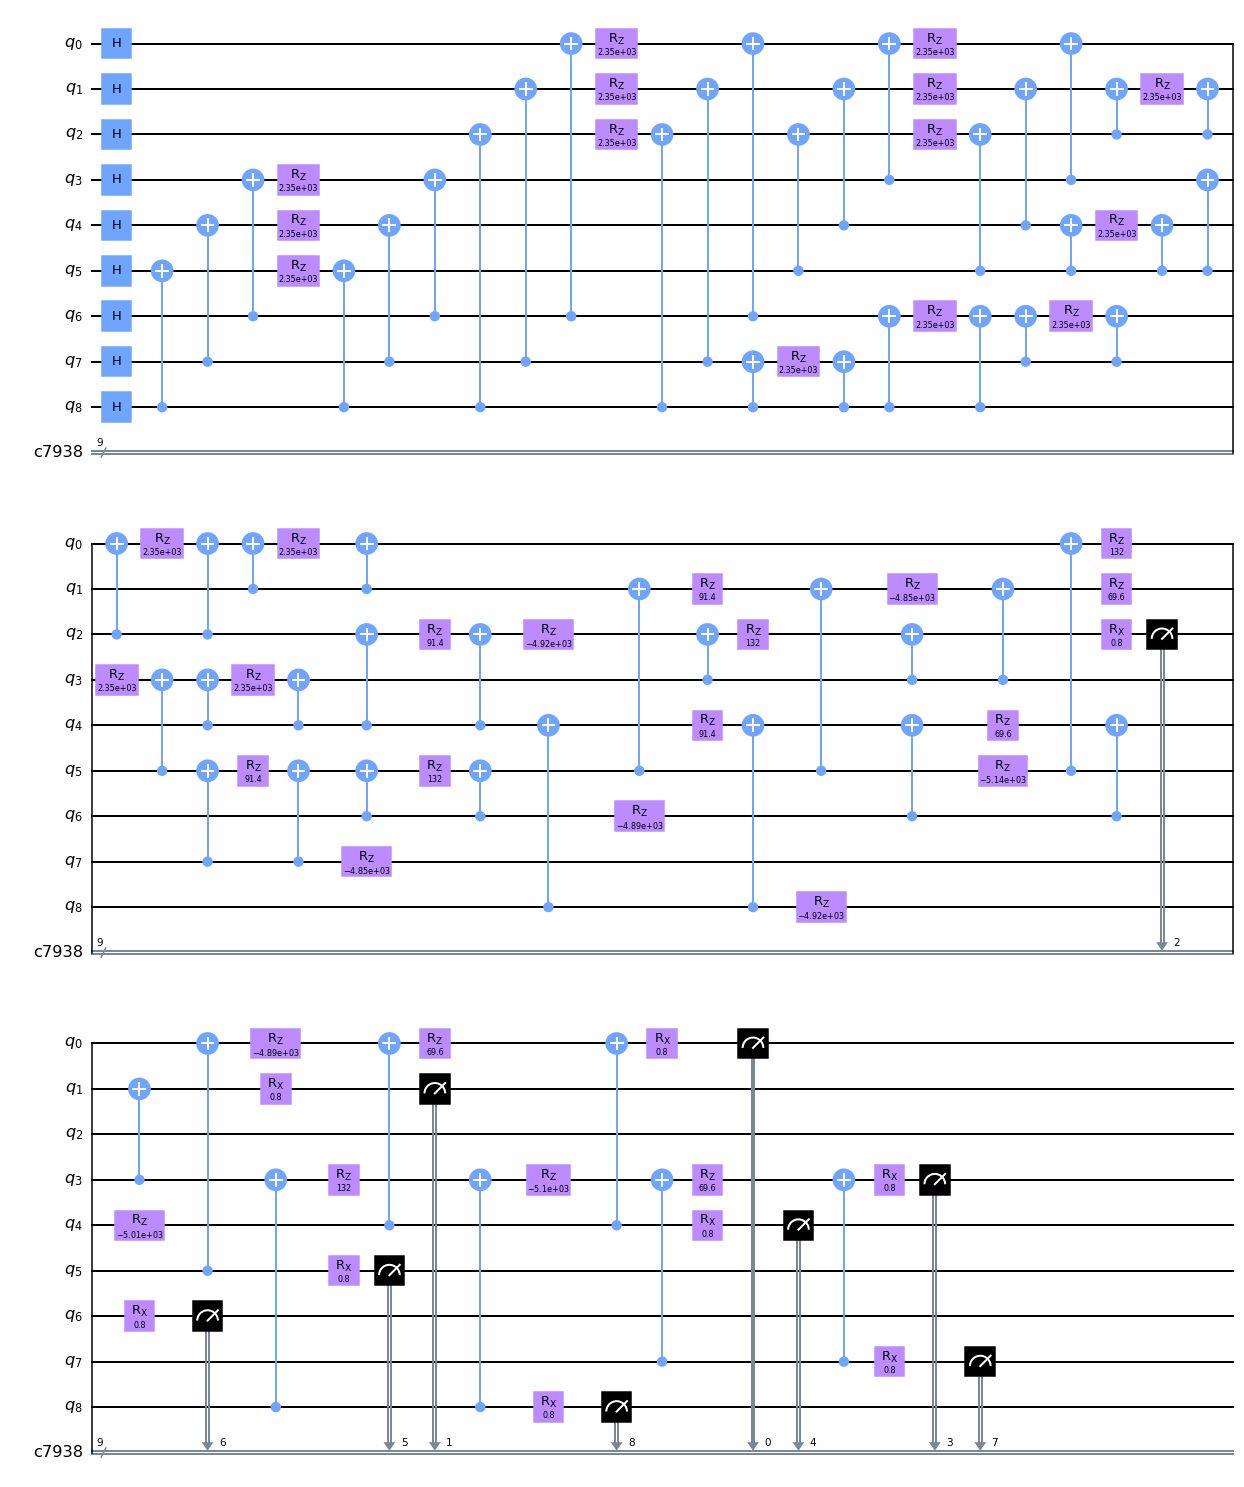

In [17]:
circuit[0].draw(output="mpl")

In [18]:
# Execution of circuit(either simulation or on real quantum machines)
backend      = Aer.get_backend("qasm_simulator")
shots        = 1024
simulate     = execute(circuit[0], backend=backend, shots=shots)
QAOA_results = simulate.result()

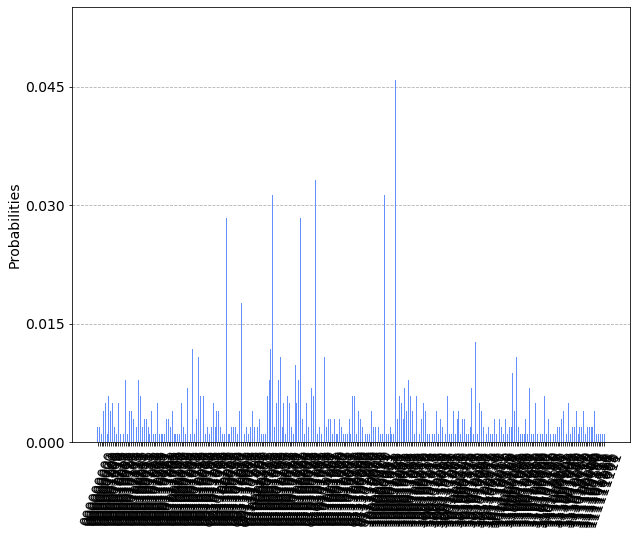

In [19]:
plot_histogram(QAOA_results.get_counts(),figsize = (10,8),bar_labels = False)

In [20]:
counts = QAOA_results.get_counts()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}  #sort the counts dictionary

In [23]:
print(sample[best_index]) #optimal parameters in the grid

[2.9000000000000004, 0.4]


In [24]:
#finds top 10 probable bitstrings and print them
clist = []
for i in counts.items():
    clist.append(i)
counts = {}  
for i in range(len(clist)-1,len(clist)-11,-1):
    print(clist[i])
    
    

('100010001', 47)
('010101010', 34)
('001010100', 34)
('010001100', 32)
('100001010', 32)
('010100001', 29)
('001100010', 29)
('001110001', 18)
('101010010', 13)
('010001010', 12)


In [25]:
counts = {}  
for i in range(len(clist)-1,len(clist)-11,-1):
    counts[clist[i][0]] = clist[i][1]

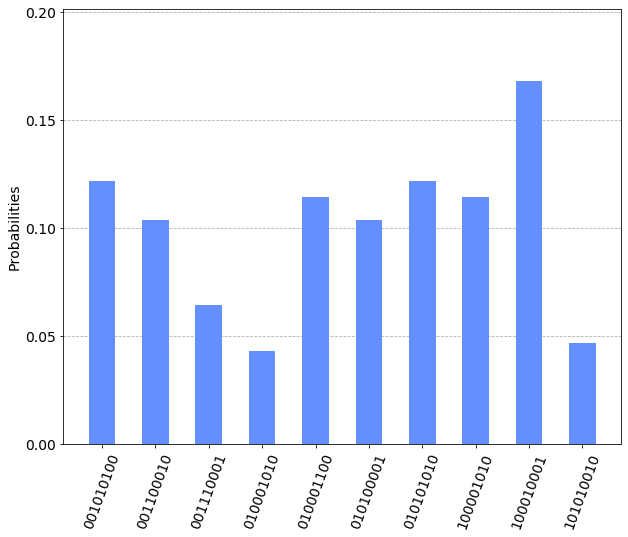

In [27]:
plot_histogram(counts,figsize = (10,8),bar_labels = False)   